In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import joblib

In [100]:
data = pd.read_csv('data.csv')
data

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.60,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.20,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.70,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.10,16.0,11.0,12.0,33,European-style renovation
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.70,15.2,4.0,5.0,5,Without renovation
...,...,...,...,...,...,...,...,...,...,...,...,...
22671,4768792.0,New building,Котельники,8.0,Moscow region,0.0,31.75,13.0,5.0,4.0,17,Cosmetic
22672,5900000.0,New building,Домодедовская,25.0,Moscow region,1.0,31.60,10.1,12.2,11.0,15,Cosmetic
22673,3700000.0,New building,Котельники,30.0,Moscow region,0.0,18.00,15.0,8.1,17.0,17,Cosmetic
22674,5768869.0,New building,Жулебино,14.0,Moscow region,2.0,36.39,22.0,6.6,12.0,14,Cosmetic


In [101]:
num_cols = ['Price', 'Minutes to metro', 'Area', 'Living area', 'Kitchen area', 'Floor', 'Number of floors']
cat_cols = ['Apartment type', 'Metro station', 'Region', 'Renovation']

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Minutes to metro'}>,
        <Axes: title={'center': 'Number of rooms'}>],
       [<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Living area'}>,
        <Axes: title={'center': 'Kitchen area'}>],
       [<Axes: title={'center': 'Floor'}>,
        <Axes: title={'center': 'Number of floors'}>, <Axes: >]],
      dtype=object)

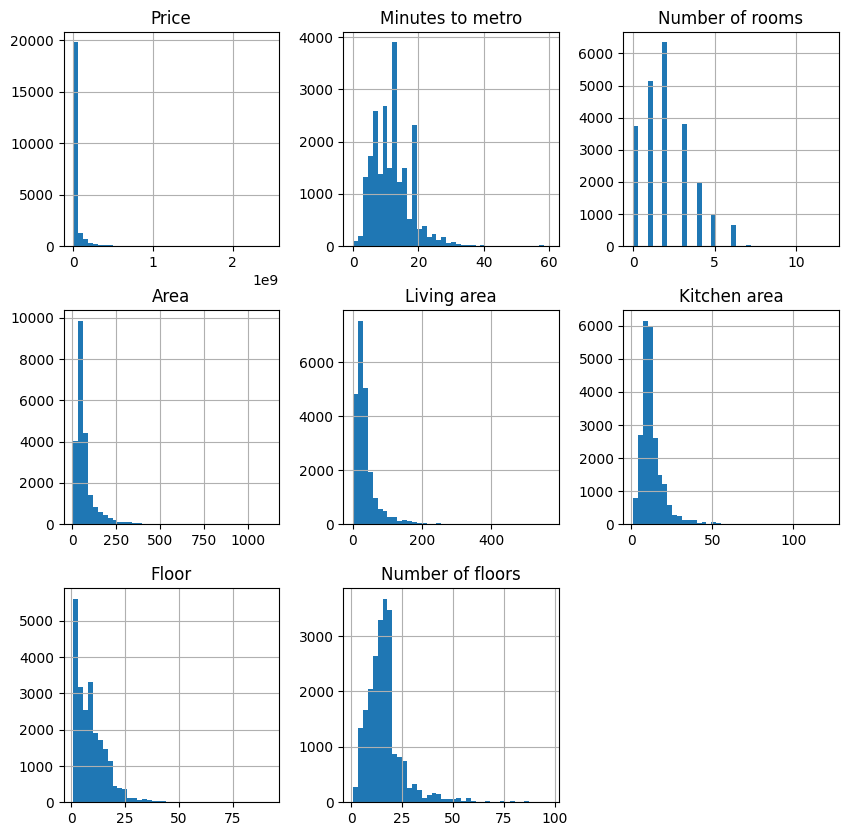

In [102]:
data.hist(figsize=(10, 10), bins=40)

In [103]:
data.duplicated().sum()

1835

In [104]:
data = data.drop_duplicates()

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20841 entries, 0 to 22675
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             20841 non-null  float64
 1   Apartment type    20841 non-null  object 
 2   Metro station     20841 non-null  object 
 3   Minutes to metro  20841 non-null  float64
 4   Region            20841 non-null  object 
 5   Number of rooms   20841 non-null  float64
 6   Area              20841 non-null  float64
 7   Living area       20841 non-null  float64
 8   Kitchen area      20841 non-null  float64
 9   Floor             20841 non-null  float64
 10  Number of floors  20841 non-null  int64  
 11  Renovation        20841 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 2.1+ MB


In [106]:
data.describe()

,Price,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors
count,2.084100e+04,20841.000000,20841.000000,20841.000000,20841.000000,20841.000000,20841.000000,20841.000000
mean,3.403777e+07,11.953265,2.039681,69.705636,37.488518,12.421419,9.179358,16.588072
std,7.962198e+07,6.257113,1.487829,64.215736,35.986182,7.539409,7.477360,9.608020
min,1.150000e+06,0.000000,0.000000,6.000000,2.000000,1.000000,1.000000,1.000000
25%,7.089768e+06,7.000000,1.000000,37.160000,17.500000,8.500000,4.000000,11.000000
50%,1.147112e+07,11.000000,2.000000,52.600000,28.400000,10.600000,8.000000,16.000000
75%,2.355000e+07,15.000000,3.000000,75.500000,43.000000,14.300000,13.000000,20.000000
max,2.455020e+09,60.000000,12.000000,1117.000000,566.800000,122.000000,92.000000,97.000000


In [107]:
data.isna().sum()

Price               0
Apartment type      0
Metro station       0
Minutes to metro    0
Region              0
Number of rooms     0
Area                0
Living area         0
Kitchen area        0
Floor               0
Number of floors    0
Renovation          0
dtype: int64

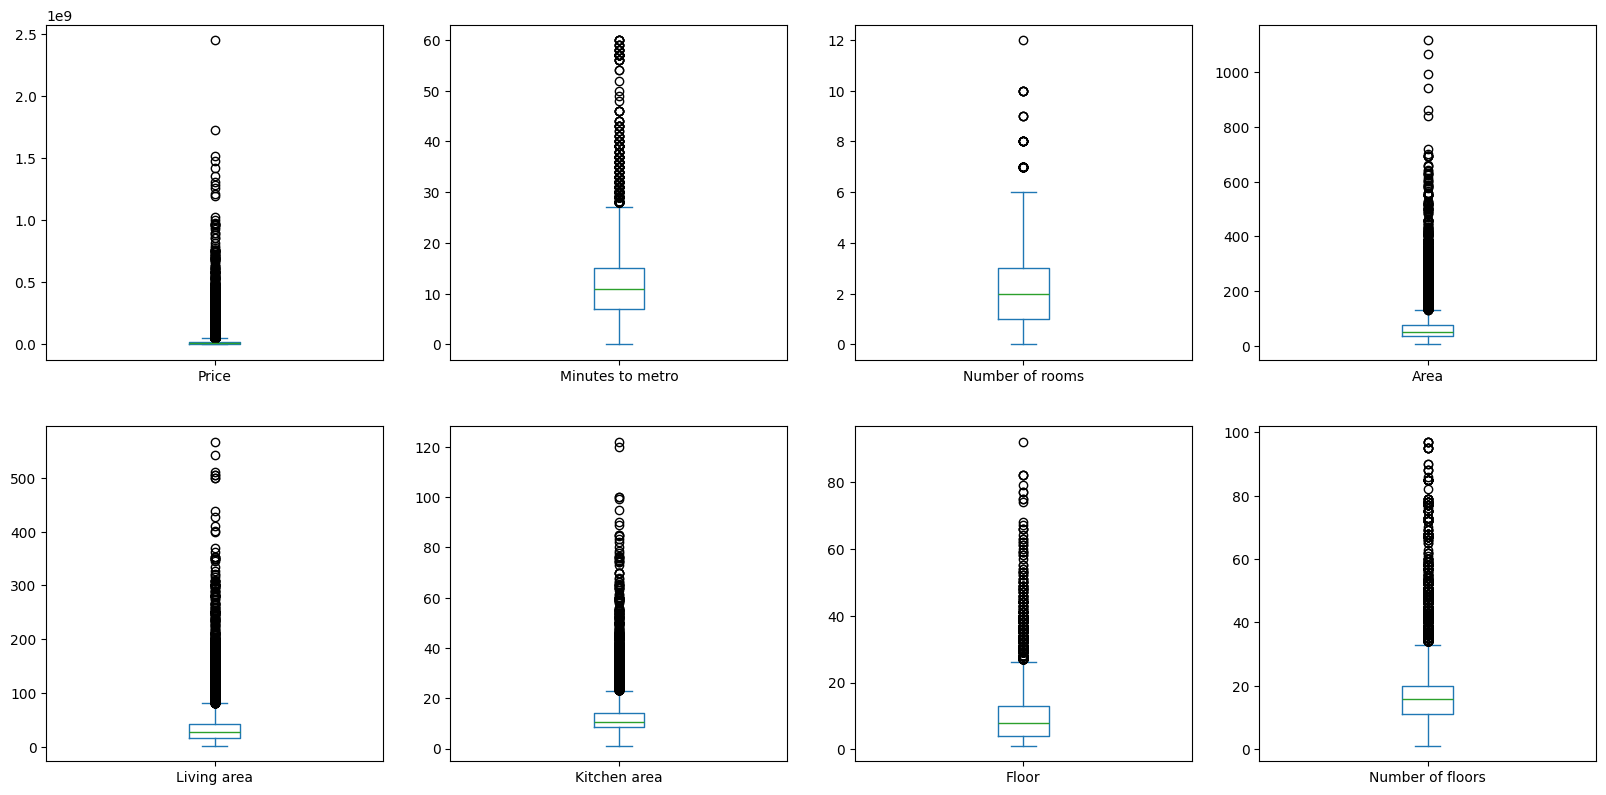

In [108]:
data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,20))
plt.show()

In [109]:
df = data.copy()

In [110]:
df['Floor'] = df['Floor'].astype(int)
df['Number of rooms'] = df['Number of rooms'].astype(int)

In [111]:
quantiles = []

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    quantiles.append([col, Q1, Q3, IQR])

quantiles

[['Price', 7089768.0, 23550000.0, 16460232.0],
 ['Minutes to metro', 7.0, 15.0, 8.0],
 ['Area', 37.16, 75.5, 38.34],
 ['Living area', 17.5, 43.0, 25.5],
 ['Kitchen area', 8.5, 14.3, 5.800000000000001],
 ['Floor', 4.0, 13.0, 9.0],
 ['Number of floors', 11.0, 20.0, 9.0]]

In [112]:
for col in quantiles:
    mask = (df[col[0]] > col[1] - 1.5*col[3]) & (df[col[0]] < col[2]+1.5*col[3])

    df = df[mask]

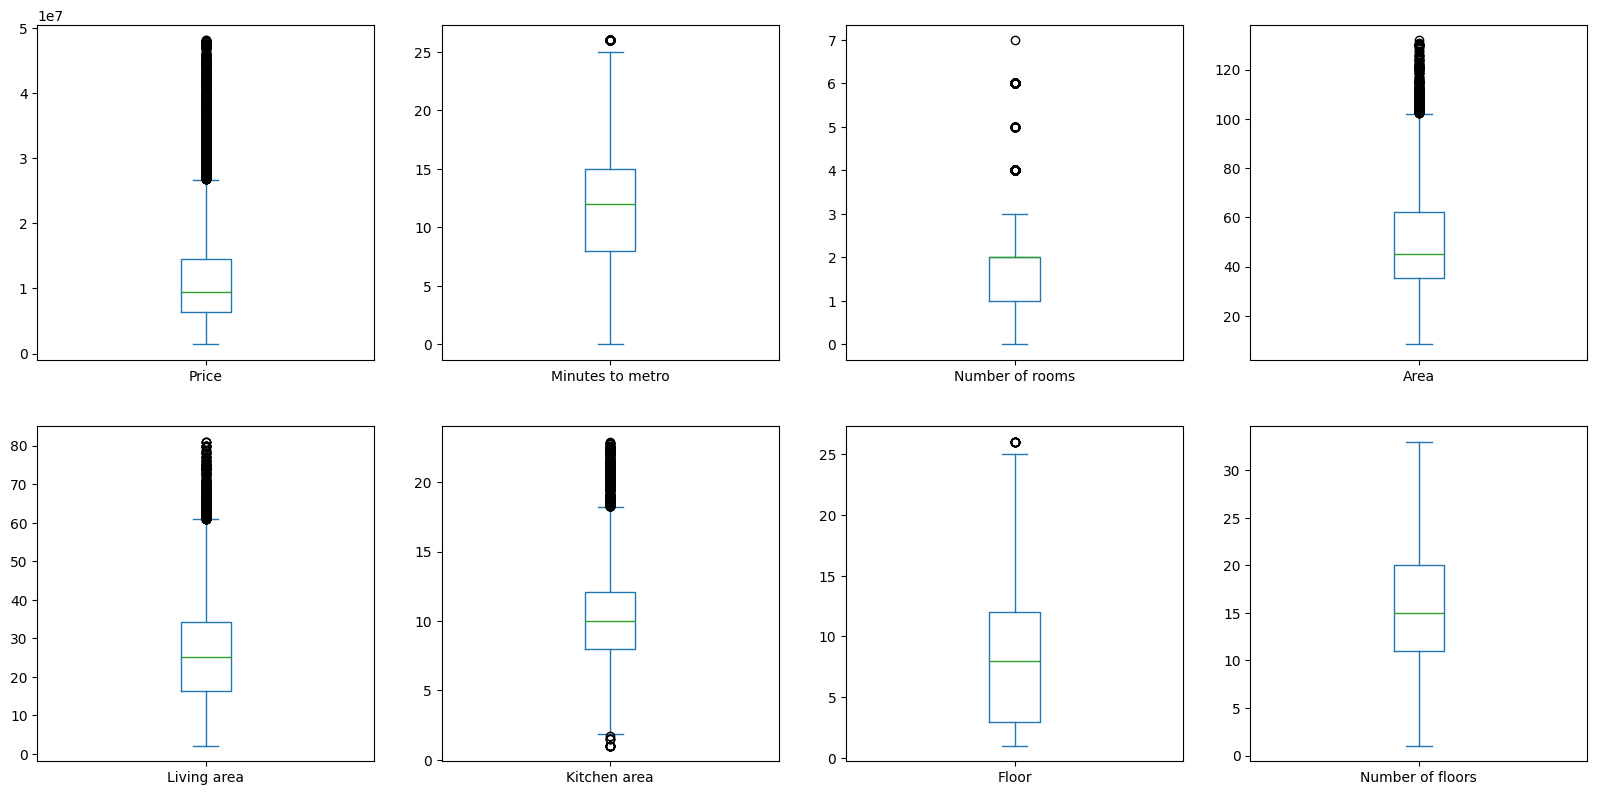

In [113]:
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,20))
plt.show()

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Minutes to metro'}>,
        <Axes: title={'center': 'Number of rooms'}>],
       [<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Living area'}>,
        <Axes: title={'center': 'Kitchen area'}>],
       [<Axes: title={'center': 'Floor'}>,
        <Axes: title={'center': 'Number of floors'}>, <Axes: >]],
      dtype=object)

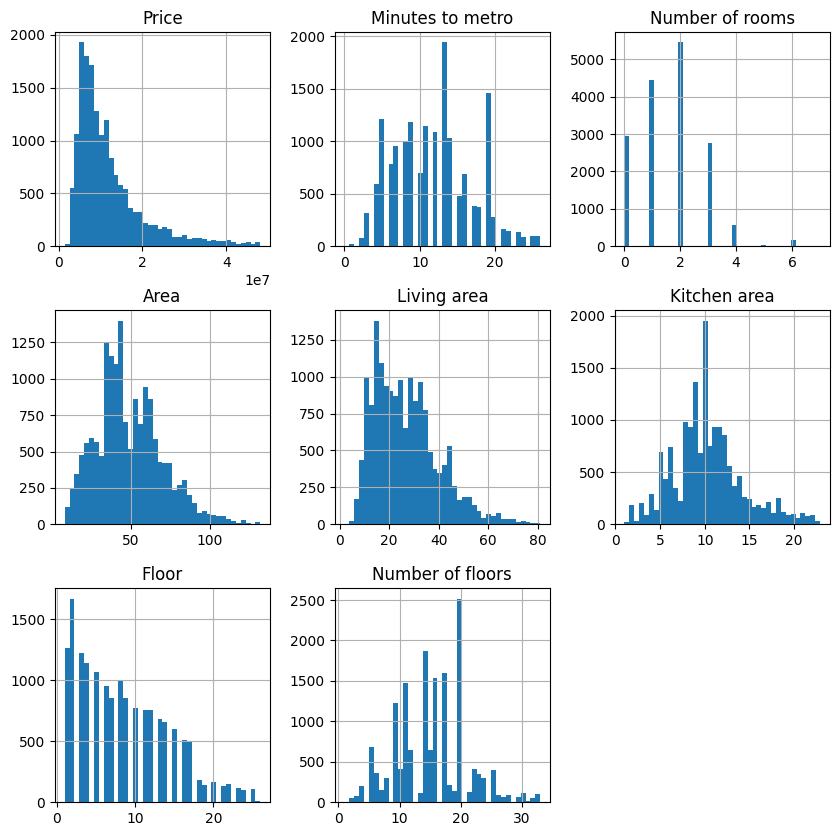

In [114]:
df.hist(figsize=(10, 10), bins=40)

In [115]:
df.shape

(16400, 12)

In [116]:
df['Metro station'] = df['Metro station'].apply(lambda x: x if x[0] != ' ' else x[1:])

In [117]:
metro_all = data['Metro station'].unique()


In [118]:
Sadovoe = ['Новослободская', 'Проспект мира', 'Белорусская','Баррикадная', 'Краснопресненская', 'Киевская', 'Cмоленская', 'Арбатская', 'Александровский сад', 'Кропоткинская', 'Библиотека им. Ленина', 'Полянка',
           'Октябрьская', 'Серпуховская', 'Добрынинская', 'Павелецкая', 'Третьяковская', 'Новокузнецкая', 'Павелецкая', 'Боровицкая', 'Площадь Революции', 'Тетральная', 'Охотный ряд', 'Китай-город', 'Лубянка',
           'Чеховская', 'Пушкинская', 'Тверская', 'Маяковская', 'Цветной бульвар', 'Трубная', 'Сухаревская', 'Сретенский бульвар', 'Тургеневская', 'Кузнецкий Мост', 'Чистые пруды', 'Красные ворота', 'Комсомольска',
           'Курская', 'Таганская', 'Марксистская', 'Парк культуры']

Second_ring = ['Нижегородская', 'Серп и молот',  'Авиамоторная', 'Лефортово', 'Электрозаводская', 'Бауманская',  'Красносельская', 'Сокольники', 'Пл. трёх вокзалов', 'Рижская', 'Достоевская', 'Марьина Роща',
               'Савёловская', 'Менделеевская',  'Петровский парк', 'Динамо', 'ЦСКА', 'Хорошёвская', 'Беговая', 'Улица 1905 года', 'Тестовская', 'Деловой центр МЦК', 'Международная', 'Выставочная', 'Деловой центр',
               'Кутузовская', 'Студенческая', 'Фрунзенская', 'Спортивная', 'Лужники', 'Шаболовская', 'Ленинский проспект', 'Площадь Гагарина', 'Крымская', 'Тульская', 'Верхние Котлы', 'ЗИЛ', 'Автозаводская', 'Дубровка',
               'Крестьянская Застава', 'Пролетарская', 'Угрешская',  'Римская', 'Площадь Ильича',  'Москва-Товарная', 'Калитники', 'Новохохловская', 'Полежаевская']

Third_ring = ['Текстильщики', 'Волгоградский проспект', 'Кожуховская', 'Печатники',  'Нагатинский Затон', 'Технопарк', 'Коломенская', 'Кленовый бульвар', 'Каширская', 'Варшавская', 'Севастопольская', 'Каховская',
              'Нахимовский проспект', 'Нагорная, Нагатинская', 'Академическая', 'Профсоюзная', 'Новые Черёмушки', 'Зюзино', 'Воронцовская', 'Калужская', 'Новаторская', 'Проспект Вернадского', 'Университет', 'Воробьёвы горы',
              'Мичуринский проспект', 'Раменки', 'Ломоносовский проспект', 'Минская', 'Поклонская', 'Парк Победы', 'Славянский бульвар', 'Матвеевская', 'Давыдково', 'Аминьевская', 'Кунцевская', 'Пионерская', 'Филёвский парк',
              'Багратионовская', 'Фили', 'Терехово', 'Кутузовская', 'Мнёвники', 'Шелепиха',  'Народное Ополчение', 'Хорошёво', 'Октябрьское поле', 'Зорге', 'Панфиловская', 'Стрешнево', 'Аэропорт', 'Сокол', 'Красный Балтиец',
              'Войковская', 'Гражданская', 'Савёловская', 'Дмитровская', 'Тимирязевская', 'Балтийская', 'Коптево', 'Лихоборы', 'Окружная', 'Владыкино', 'Петровско-Разумовская', 'Фонфизинская', 'Бутырская', 'Останкино', 'ВДНХ',
              'Алексеевская', 'Ботанический сад', 'Ростокино', 'Белокаменная', 'Бульвар Рокоссовского', 'Локомотив', 'Черкизовская', 'Преображенская площадь', 'Партизанская', 'Измайлово', 'Соколиная гора', 'Семёновская', 'Перово',
              'Шоссе Энтузиастов', 'Сортировочная', 'Андроновка']

In [119]:
Beyond_rings = []

for station in metro_all:
    if (station not in Sadovoe) and (station not in Second_ring) and (station not in Third_ring):
        Beyond_rings.append(station)


In [120]:
def station_to_ring(station):
    if station in Sadovoe:
        return 'Sadovoe'
    elif station in Second_ring:
        return 'Second_ring'
    elif station in Third_ring:
        return 'Third_ring'
    else:
        return 'Beyond_rings'

In [121]:
df = df[((df['Number of rooms'] == 0) & (df['Area'] < 70)) | (df['Number of rooms'] > 0)]
df

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1,30.60,11.1,8.5,25,25,Cosmetic
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1,49.20,20.0,10.0,6,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1,44.70,16.2,13.1,10,25,Cosmetic
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1,35.10,16.0,11.0,12,33,European-style renovation
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1,37.70,15.2,4.0,5,5,Without renovation
...,...,...,...,...,...,...,...,...,...,...,...,...
22668,5728683.0,New building,Красногвардейская,16.0,Moscow region,2,39.71,27.1,4.1,9,20,Cosmetic
22670,5884024.0,New building,Котельники,8.0,Moscow region,1,44.17,24.5,10.3,4,17,Cosmetic
22672,5900000.0,New building,Домодедовская,25.0,Moscow region,1,31.60,10.1,12.2,11,15,Cosmetic
22674,5768869.0,New building,Жулебино,14.0,Moscow region,2,36.39,22.0,6.6,12,14,Cosmetic


In [122]:
dict_unique = {key: df[key].unique().tolist() for key in df.columns}

PATH_UNIQUE_VALUES = 'unique_values1.json'
with open(PATH_UNIQUE_VALUES, 'w') as file:
    json.dump(dict_unique, file)

In [123]:
df['Ring'] = df['Metro station'].apply(station_to_ring)

C:\Users\aygul\AppData\Local\Temp\ipykernel_5872\775464658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ring'] = df['Metro station'].apply(station_to_ring)


In [124]:
df['Number of rooms'] = df['Number of rooms'].apply(lambda x: -1 if x == 0 else x)
df['Area_to_rooms'] = df['Area'] / abs(df['Number of rooms'])
df['Number of rooms'] = df['Number of rooms'].apply(lambda x: 0 if x == -1 else x)
df

C:\Users\aygul\AppData\Local\Temp\ipykernel_5872\3691056006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Number of rooms'] = df['Number of rooms'].apply(lambda x: -1 if x == 0 else x)
C:\Users\aygul\AppData\Local\Temp\ipykernel_5872\3691056006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Area_to_rooms'] = df['Area'] / abs(df['Number of rooms'])
C:\Users\aygul\AppData\Local\Temp\ipykernel_5872\3691056006.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation,Ring,Area_to_rooms
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1,30.60,11.1,8.5,25,25,Cosmetic,Beyond_rings,30.600
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1,49.20,20.0,10.0,6,15,European-style renovation,Beyond_rings,49.200
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1,44.70,16.2,13.1,10,25,Cosmetic,Beyond_rings,44.700
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1,35.10,16.0,11.0,12,33,European-style renovation,Beyond_rings,35.100
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1,37.70,15.2,4.0,5,5,Without renovation,Beyond_rings,37.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22668,5728683.0,New building,Красногвардейская,16.0,Moscow region,2,39.71,27.1,4.1,9,20,Cosmetic,Beyond_rings,19.855
22670,5884024.0,New building,Котельники,8.0,Moscow region,1,44.17,24.5,10.3,4,17,Cosmetic,Beyond_rings,44.170
22672,5900000.0,New building,Домодедовская,25.0,Moscow region,1,31.60,10.1,12.2,11,15,Cosmetic,Beyond_rings,31.600
22674,5768869.0,New building,Жулебино,14.0,Moscow region,2,36.39,22.0,6.6,12,14,Cosmetic,Beyond_rings,18.195


In [125]:
df.to_csv('data_clean.csv')

In [126]:
cat_cols = ['Apartment type', 'Metro station', 'Region', 'Renovation', 'Ring']

In [127]:
X = df.drop(columns='Price', axis=1)
y = df['Price']

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [129]:
from catboost import CatBoostRegressor

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)

In [132]:
catb = CatBoostRegressor(silent=True, cat_features=cat_cols)

catb.fit(X_train, y_train)

In [133]:
print('R2 score on train: ', catb.score(X_train, y_train))
print('R2 score on test: ', catb.score(X_test, y_test))

R2 score on train:  0.9483307134492216
R2 score on test:  0.9171325886927137


In [134]:
joblib.dump(catb, 'model2.sav')

['model2.sav']

In [144]:
pip show seaborn

Name: seaborn
Version: 0.13.0
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: c:\Users\aygul\AppData\Local\Programs\Python\Python311\Lib\site-packages
Requires: matplotlib, numpy, pandas
Required-by: missingno
Note: you may need to restart the kernel to use updated packages.
